In [31]:
#import mdptoolbox.example
import hiive.mdptoolbox.example as example
import hiive.mdptoolbox.mdp as mdp
import numpy as np
#import hiive.mdptoolbox, hiive.mdptoolbox.example
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def vi_plot(mol):
    #vi = mdp.ValueIteration(pp,rr,0.96)
    #result = mol.run_forest()
    result = mol.run()
#     try:
#         result = mol.run_forest()
#         print('here')
#     except:
#         result = mol.run()
    errors = [i['Error'] for i in result]
    vi_re = [i['Reward'] for i in result]
    ax1 = plt.subplot(211)
    plt.plot(errors)
    #plt.setp(ax1.get_xticklabels(), fontsize=6)
    ax1.set_title('error')
    # share x only
    ax2 = plt.subplot(212)
    plt.plot(vi_re)
    # make these tick labels invisible
    #plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_title('rewards')
    
    plt.plot()
    #plt.title('MDP result')
    return result,errors,vi_re

In [3]:
P, R = example.forest(S=400, r1=400, r2=200, p=0.1, is_sparse=False)

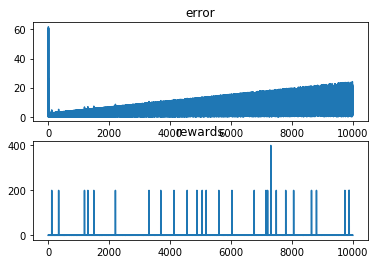

In [13]:
n_iter = 1000000
ql = mdp.QLearning(P, R, 0.999999996 , n_iter=n_iter,
                   epsilon=1,epsilon_decay=0.99,epsilon_min=0.1,
                   alpha_decay=0.999,alpha = 1,alpha_min=0.01
                   ,run_stat_frequency=1)
ql.setVerbose()
ql_result,ql_error,ql_reward = vi_plot(ql)

In [14]:
sum(ql.policy)

229

In [22]:
import pandas as pd

In [23]:
qlp = pd.DataFrame(ql.policy)

In [24]:
ql_result[0]

{'State': 265,
 'Action': 0,
 'Reward': 0.0,
 'Error': 0.0,
 'Time': 0.012967109680175781,
 'Alpha': 0.9056978449586682,
 'Epsilon': 0.36972963764972655,
 'Gamma': 0.999999996,
 'Max V': 16.44970280149264,
 'Mean V': 0.15194856418021915,
 'Iteration': 100}

In [26]:
states = [i['State'] for i in ql_result]
states = pd.DataFrame(states)

In [33]:
sum(ql.policy)

189

In [ ]:
sum([vi.policy[i]==ql.policy[i]] for i in range(400))

In [35]:
a

0.1

In [36]:
e

1

In [27]:
states.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [15]:
set(range(400))-set([i['State'] for i in ql_result])

set()

In [13]:
ql.policy[-10:]

(1, 1, 1, 0, 0, 0, 1, 0, 0, 0)

In [16]:
ql.V

(2412.1380188947896,
 2412.6273544081682,
 2401.6712819404247,
 2162.998136651427,
 660.2511512157654,
 363.41572930368153,
 287.1864854726072,
 241.94924310796245,
 76.45290831624213,
 490.44970192773786,
 376.0751991161974,
 112.24959820172758,
 550.2493470246321,
 30.664924326516317,
 120.43336697694441,
 638.5338094993363,
 44.06305774288941,
 441.63310353911584,
 231.8825282746934,
 117.90391648046847,
 566.6577704721868,
 313.02974482993943,
 272.57262816811857,
 190.35576310425452,
 77.60243797397874,
 512.2072055563895,
 218.8050054429521,
 385.553873100441,
 17.533779900775055,
 63.62918211498073,
 95.5167025279605,
 283.79489744403617,
 990.9227776947325,
 346.5120993241955,
 266.600266777992,
 74.52704862453501,
 506.9750468214893,
 81.85534956498962,
 210.74873058974737,
 685.9873096005211,
 318.72173401088133,
 241.96246079720277,
 332.2651204554433,
 284.6616212241552,
 276.9219421121706,
 108.94420813429419,
 675.3994882942735,
 265.3890308619982,
 291.3780192097307,
 33

In [43]:
example.forest(S=3, r1=4, r2=2, p=0.1, is_sparse=False)

(array([[[0.1, 0.9, 0. ],
         [0.1, 0. , 0.9],
         [0.1, 0. , 0.9]],
 
        [[1. , 0. , 0. ],
         [1. , 0. , 0. ],
         [1. , 0. , 0. ]]]), array([[0., 0.],
        [0., 1.],
        [4., 2.]]))

In [16]:
P = np.array([[[0.5, 0.5],[0.8, 0.2]],[[0, 1],[0.1, 0.9]]])
R = np.array([[5, 10], [-1, 2]])

In [3]:
P, R = example.forest(S=400, r1=400, r2=200, p=0.1, is_sparse=False)

In [4]:
P, R = example.rand(10, 3)

 Iteration   Variation
         1  400.000000
         2  345.600000
         3  298.598400
         4  257.989018
         5  222.902511
         6  192.587770
         7  166.395833
         8  143.766000
         9  124.213824
        10  107.320744
        11   92.725123
        12   80.114506
        13   69.218933
        14   59.805158
        15   51.671657
        16   44.644311
        17   38.572685
        18   33.326800
        19   28.794355
        20   24.878323
        21   21.494871
        22   18.571568
        23   16.045835
        24   13.863602
        25   11.978152
        26   10.349123
        27    8.941642
        28    7.725579
        29    6.674900
        30    5.767114
        31    4.982786
        32    4.305127
        33    3.719630
        34    3.213760
        35    2.776689
        36    2.399059
        37    2.072787
        38    1.790888
        39    1.547327
        40    1.336891
        41    1.155074
        42    0.997984
        43 

353

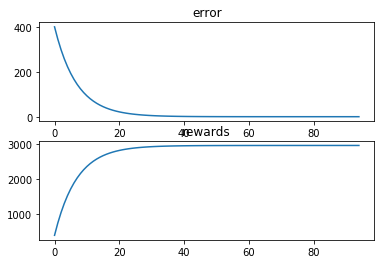

In [18]:
#P, R = example.forest(S=500, r1=200, r2=20, p=0.1, is_sparse=False)
vi = mdp.ValueIteration(P, R, 0.96, epsilon=0.01,max_iter = 100000)
vi.setVerbose()
result,error,reward = vi_plot(vi)
sum(vi.policy)

In [51]:
[i['Max V'] for i in result]

[200.0,
 372.79999999999995,
 522.182144,
 651.25627904,
 762.8458931978239,
 859.2726022514278,
 942.6442510628593,
 1014.6940339375682,
 1076.995561350815,
 1130.8427641272779,
 1177.4104400723963,
 1217.6646030959641,
 1252.4823307964512,
 1282.5848405999259,
 1308.6269556555405,
 1331.1471465879827,
 1350.6343175717589,
 1367.4905128347543,
 1382.0807723256428,
 1394.705292392864,
 1405.6366429608233,
 1415.098985703211,
 1423.2958566266661,
 1430.3946526263683,
 1436.5473711754491,
 1441.8790296985599,
 1446.5031477609114,
 1450.5131022670625,
 1453.9936849396074,
 1457.014649092684,
 1459.6393373232986,
 1461.9198642800889,
 1463.90355727385,
 1465.629360304212,
 1467.132642017339,
 1468.4425113912266,
 1469.5854069192865,
 1470.5830928400594,
 1471.4553385059119,
 1472.2184226317336,
 1472.8871334859496,
 1473.4736523690333,
 1473.989046796937,
 1474.442437069155,
 1474.8421109691963,
 1475.1949016541873,
 1475.5070198157998,
 1475.7835893171532,
 1476.029268435848,
 1476.247903

In [14]:
errors = [i['Error'] for i in result]

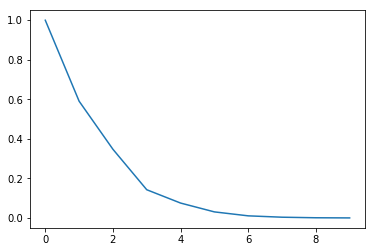

In [18]:
plt.plot(errors)

In [19]:
vi.V

(3.34216629799929,
 3.1244979594224764,
 3.0611419359850696,
 2.6429935755433616,
 2.7673979690391595,
 3.297219048138617,
 2.6640647141112677,
 3.054910745851874,
 2.660934948723211,
 2.931907896421391)

In [34]:
vi.policy

(0, 0, 2, 1, 1, 2, 1, 1, 1, 2)

In [40]:
vi.iter

16

In [53]:
pi = mdp.PolicyIteration(P, R, 0.9)
pi.setVerbose()

 Iteration   Variation
         1           1
         2           1
         3           1
         4           1
         5           1
         6           1
         7           1
         8           1
         9           1
        10           1
        11           1
        12           1
        13           1
        14           1
        15           1
        16           1
        17           1
        18           1
        19           1
        20           1
        21           1
        22           1
        23           1
        24           1
        25           1
        26           1
        27           1
        28           0
Iterating stopped, unchanging policy found.


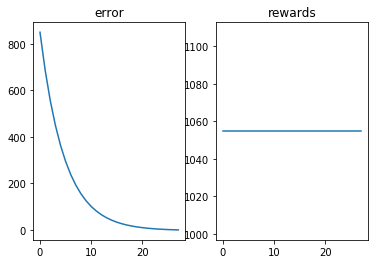

In [54]:
pi_result,pi_error,pi_reward = vi_plot(pi)

In [59]:
sum([vi.policy[i] == pi.policy[i] for i in range(len(vi.policy))])

487

In [66]:
vi.policy[480:]==pi.policy[480:]

True

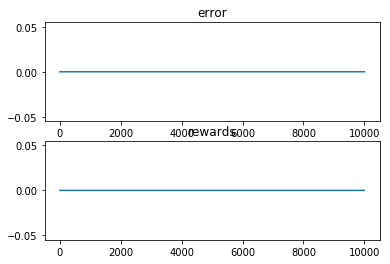

In [6]:
n_iter = 100000
ql = mdp.QLearning(P, R, 0.999999996 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999,alpha = 1
                   ,run_stat_frequency=None)
ql.setVerbose()
ql_result,ql_error,ql_reward = vi_plot(ql)

In [12]:
sum(ql.policy)

23

In [74]:
ql.gamma**300

4.801422373777491e-06

In [78]:
sum(ql.policy)

25

In [79]:
sum(vi.policy)

458

In [76]:
ql.Q

array([[1.86154905e+02, 1.69753156e+02],
       [1.59902123e+02, 1.86652378e+02],
       [1.06430355e+02, 1.68414265e+02],
       [6.87732378e+01, 1.23041978e+02],
       [5.52851926e+00, 7.89232042e+01],
       [4.88951087e+00, 0.00000000e+00],
       [5.92617806e+00, 3.26776118e+01],
       [0.00000000e+00, 7.19564920e+00],
       [0.00000000e+00, 2.09016399e+01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.78500388e+01],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

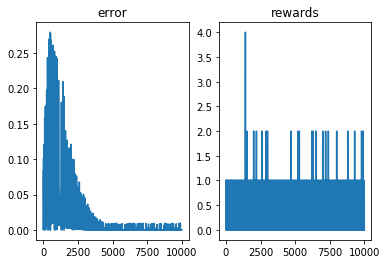

In [17]:
n_iter = 10000
ql = mdp.QLearning(P, R, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999)
ql.setVerbose()
ql_result,ql_error,ql_reward = vi_plot(ql)

In [21]:
max(ql.Q[0][:])

8.789817359825925

In [22]:
max(ql.Q[1][:])

9.318637409519805

In [105]:
p20000 = ql.policy

In [108]:
p10000 = ql.policy

In [112]:
p10000[:10]

(0, 1, 1, 1, 1, 1, 0, 0, 0, 0)

In [76]:
import numpy as np

In [81]:
np.where(ql_reward==1.0)

(array([], dtype=int64),)

In [86]:
ql_reward[3]==1

True

In [88]:
ql_reward.index(1)

1

In [100]:
type(ql.policy)

tuple

In [102]:
sum([ql.policy[i] == vi.policy[i] for i in range(len(ql.policy))])

43

In [114]:
sum([ql.policy[i] == vi.policy[i] for i in range(len(ql.policy))])

36

In [91]:
time = [i['Time'] for i in result]

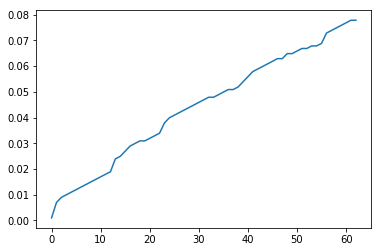

In [92]:
plt.plot(time)

In [ ]:
gamma, alpha, alpha_decay, alpha_min, epsilon, epsilon_min, epsilon_decay, n_iter

In [ ]:
ql = mdp.QLearning(P, R, 0.96 , n_iter=n_iter,epsilon_decay=0.999,epsilon_min=0.001,alpha_decay=0.999)


In [117]:
max(vi.V)

36.68421799327019

In [125]:
max(pi.V)

23.172433847048566

In [124]:
max(ql.V)

9.012146178794062

In [123]:
max(ql.Q[:,1])

9.012146178794062

In [150]:
R

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [135]:
def ql_hyper_tune(P=P,R=R,gamma=0.96, alpha=0.1, alpha_decay=.99, alpha_min=.001, epsilon=1.0, epsilon_min=0.1, 
                  epsilon_decay=0.99, n_iter=10000):
    ql = mdp.QLearning(P,R,gamma,n_iter)
    ql.run()
    return ql.policy
    
    

In [138]:
results = []
for n_iter in [10000000,20000000]:
    #for gamma in [0.7,0.9,0.99]:
        results.append(ql_hyper_tune(n_iter=n_iter))

In [139]:
for r in results:
    print(sum([r[i] == vi.policy[i] for i in range(len(ql.policy))]))

45
53


In [134]:
for r in results:
    print(sum([r[i] == vi.policy[i] for i in range(len(ql.policy))]))

50
46
48
43


In [137]:
for r in results:
    print(sum([r[i] == vi.policy[i] for i in range(len(ql.policy))]))

45
42


In [140]:
len(ql.policy)

400

In [144]:
for r in results:
    print(sum([pi.policy[i] == vi.policy[i] for i in range(len(ql.policy))]))

396
396
